<a href="https://colab.research.google.com/github/MekaSaiKrishna/ECE595-MachineLearning/blob/Homeworks/Homework_2_ECE595.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework-2: Due on Feb 11th 4:59PM

Exercise 1: Loading Data via Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import csv

#Reading csv file for male data
with open("/content/drive/MyDrive/Colab Notebooks/male_train_data.csv","r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  fields1 = next(reader)    #Stores the first row of fields
  data1 = []                #Empty list to read the data
  for row in reader: 
    data1.append((row))     #Storing data row by row

data1_new = np.array(data1).astype(float)  # Convert list into Array and Convert\
                                           # data type from String to float
#Normalizing Male Data
data1_temp = data1_new[:,0].T        # index values
data2_temp = (data1_new[:,1].T)/10   # normalized male BMI
data3_temp = (data1_new[:,2].T)/1000 # normalized male stature

male_train_data_norm  = np.column_stack((data1_temp.T, data2_temp.T, data3_temp.T))

csv_file.close()


#Reading csv file for female data
with open("/content/drive/MyDrive/Colab Notebooks/female_train_data.csv","r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  fields2 = next(reader) #Stores the first row of fields
  data2 = []             #Empty list to read the data
  for row in reader: 
    data2.append((row))   #Storing data row by row

data2_new = np.array(data2).astype(float)  # Convert list into Array and Convert\
                                           # data type from String to float
#Normalizing female Data
data1_temp = data2_new[:,0].T        # index values
data2_temp = (data2_new[:,1].T)/10   # normalized female BMI
data3_temp = (data2_new[:,2].T)/1000 # normalized female stature

female_train_data_norm  = np.column_stack((data1_temp.T, data2_temp.T, data3_temp.T))

csv_file.close()

#Print Results
print('femaleBMI Normalized: \n',female_train_data_norm[0:10,1])
print("\n")
print('femaleStature Normalized: \n',female_train_data_norm[0:10,2])
print("\n")
print('maleBMI Normalized: \n',male_train_data_norm[0:10,1])
print("\n")
print('maleStature Normalized: \n',male_train_data_norm[0:10,2])

femaleBMI Normalized: 
 [2.82 2.22 2.71 2.81 2.55 2.3  3.56 3.11 2.46 4.3 ]


femaleStature Normalized: 
 [1.563 1.716 1.484 1.651 1.548 1.665 1.564 1.676 1.69  1.704]


maleBMI Normalized: 
 [3.   2.56 2.42 2.74 2.59 2.53 2.27 2.54 3.41 3.34]


maleStature Normalized: 
 [1.679 1.586 1.773 1.816 1.809 1.662 1.829 1.686 1.761 1.797]


Exercise 2: Build a Linear Classifier via Optimization



(b) Using lstsq method: theta= [-10.7017505   -0.12339677   6.67486843]
(c) Using cvxpy method: theta= [-10.7   -0.12   6.67]
(e) Using gradient descent: theta= [-10.7   -0.12   6.67]
(f) Using Momemntum Method: theta= [-10.7   -0.12   6.67]




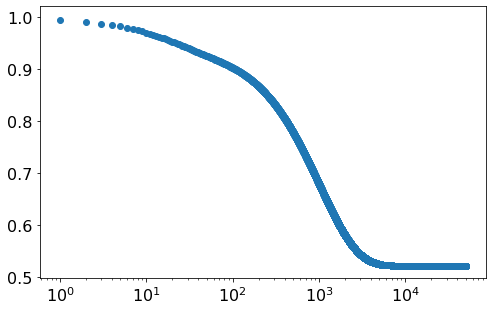

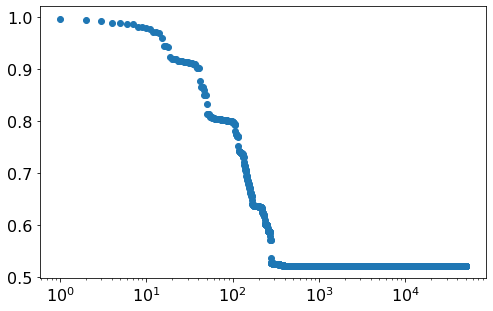

In [2]:
from numpy.ma.core import concatenate
from scipy import linalg as LA 
plt.rcParams.update({'font.size': 16})

#Create y array for Male i.e. yn=+1
len_male = len(male_train_data_norm[:,0])
y_male = np.ones(len_male)


#Create y array for Female i.e. yn=-1
len_female = len(female_train_data_norm[:,0])
y_female = -np.ones(len_female)


#Form Y array combined
Y_new = np.concatenate((y_male,y_female),axis=None)

#Form X matrix combined
X_new_0 = np.ones(len_male+len_female)
X_new_1 = np.concatenate((male_train_data_norm[:,1],female_train_data_norm[:,1]),axis=None)
X_new_2 = np.concatenate((male_train_data_norm[:,2],female_train_data_norm[:,2]),axis=None)

X_new = np.column_stack((X_new_1,X_new_2))
#Adding the bias column to the X data
X_new = np.column_stack((X_new_0,X_new))


#Finding theta

#Part-(A): Least Squares Method
theta_hat = LA.lstsq(X_new, Y_new, cond=None)[0]
y_hat = np.dot(X_new,theta_hat)

print("\n")
print("(b) Using lstsq method: theta=", theta_hat)

#Part-(B): CVXPY
np.set_printoptions(precision=2, suppress=True)
theta_cvxpy     = cp.Variable(3) #bias,x1,x2

objective   = cp.Minimize(cp.sum_squares(Y_new.T-(X_new@theta_cvxpy.T)))
constraints = []
prob     = cp.Problem(objective,constraints)

optimal_objective_value = prob.solve()
#print(optimal_objective_value)
print("(c) Using cvxpy method: theta=",theta_cvxpy.value)

#Part-(E): Gradient Descent

#Setup the Problem
N = len_male+len_female

#Initialize Gradient Descent
theta_gradDes = np.zeros(3)
cost = np.zeros(50000)
XtX  = np.dot(np.transpose(X_new),X_new)

#Gradient Descent
for itr in range(50000):
  dJ    = np.dot(np.transpose(X_new), np.dot(X_new, theta_gradDes)-Y_new)
  dd    = dJ
  alpha = np.dot(dJ,dd) / np.dot(np.dot(XtX,dd),dd) 
  theta_gradDes = theta_gradDes - alpha*dd
  cost[itr] = np.linalg.norm(np.dot(X_new, theta_gradDes)-Y_new)**2/N

print("(e) Using gradient descent: theta=",theta_gradDes)

#Plotting
fig = plt.figure(figsize = (8,5))
plt.semilogx(cost,'o',linewidth='8')
plt.savefig("Q2_(e)GradDescent_Lossfunction_semilog.png")

#Part-(G): Momentum Method 

#Construct X matrix
beta = 0.9
theta_mom = np.zeros(3)
cost = np.zeros(50000)
XtX  = np.dot(np.transpose(X_new),X_new)
dJ_old = np.zeros(3) 

for itr in range(50000):
  dJ    = np.dot(np.transpose(X_new),np.dot(X_new,theta_mom)-Y_new)
  dd    = beta*dJ_old + (1-beta)*dJ
  alpha = np.dot(dJ,dd)/np.dot(np.dot(XtX,dd),dd)
  theta_mom = theta_mom - alpha*dd
  dJ_old    = dJ
  cost[itr] = np.linalg.norm(np.dot(X_new, theta_mom)-Y_new)**2/N

print("(f) Using Momemntum Method: theta=",theta_mom)
print("\n")
#Plotting
fig = plt.figure(figsize = (8,5))
plt.semilogx(cost, 'o', linewidth='8')
plt.savefig("Q2_(g)MomentumMethod_Lossfunction_semilog.png")

Exercise 3: Visualization and Testing 

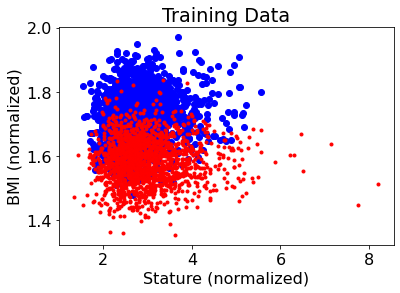

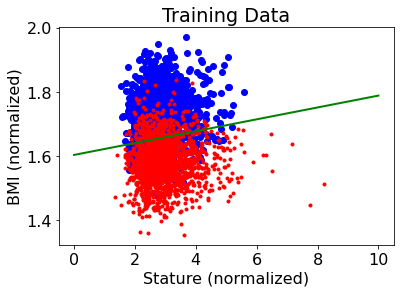



Type-1 error(False Alarm) of classifying FEMALE (in %):  17.96
90
411
Type-2 error(Miss) of classifying MALE (in %):  17.96
--------------------------------------------------------------------
Type-1 error(False Alarm) of classifying MALE (in %):  14.17
501
71
Type-2 error(Miss) of classifying FEMALE (in %):  14.17
----------------------------
H0 - Female, H1 - Male
----------------------------
Precision (%): 85.27
Recall (%): 82.04


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import csv

#LOADING DATA AND CONVERTING
#---------------------------

#Reading csv file for male data
with open("/content/drive/MyDrive/Colab Notebooks/male_train_data.csv","r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  fields1 = next(reader)    #Stores the first row of fields
  data1 = []                #Empty list to read the data
  for row in reader: 
    data1.append((row))     #Storing data row by row

data1_new = np.array(data1).astype(float)  # Convert list into Array and Convert\
                                           # data type from String to float
#Normalizing Male Data
data1_temp = data1_new[:,0].T        # index values
data2_temp = (data1_new[:,1].T)/10   # normalized male BMI
data3_temp = (data1_new[:,2].T)/1000 # normalized male stature

male_train_data_norm  = np.column_stack((data1_temp.T, data2_temp.T, data3_temp.T))

csv_file.close()


#Reading csv file for female data
with open("/content/drive/MyDrive/Colab Notebooks/female_train_data.csv","r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  fields2 = next(reader) #Stores the first row of fields
  data2 = []             #Empty list to read the data
  for row in reader: 
    data2.append((row))   #Storing data row by row

data2_new = np.array(data2).astype(float)  # Convert list into Array and Convert\
                                           # data type from String to float
#Normalizing female Data
data1_temp = data2_new[:,0].T        # index values
data2_temp = (data2_new[:,1].T)/10   # normalized female BMI
data3_temp = (data2_new[:,2].T)/1000 # normalized female stature

female_train_data_norm  = np.column_stack((data1_temp.T, data2_temp.T, data3_temp.T))

csv_file.close()

# (a) Visualize the Classifier:

#(i)Plot the training data
plt.scatter(male_train_data_norm[:,1], male_train_data_norm[:,2], marker='o',color='blue')
plt.scatter(female_train_data_norm[:,1], female_train_data_norm[:,2], marker='.',color='red')
plt.title("Training Data")
plt.ylabel("BMI (normalized)")
plt.xlabel("Stature (normalized)")
plt.savefig("Q3_(a)(i)trainingdata_scatter.png")
plt.show()
print("\n")

#plt.scatter(female_train_data_norm[:,1], female_train_data_norm[:,2], marker='.',color='red')
#plt.title("Female Training Data")
#plt.savefig("Q3_(a)(i)female_train.png")
#plt.show()
#print("\n")

#(ii)Plot the decision boundary
x1 = np.linspace(0,10,100)
x2 = -(theta_mom[1]/theta_mom[2])*x1 + (-theta_mom[0]/theta_mom[2])*np.ones(len(x1)) 

plt.plot(x1,x2,linewidth='2',color='green')
plt.scatter(male_train_data_norm[:,1], male_train_data_norm[:,2], marker='o',color='blue')
plt.scatter(female_train_data_norm[:,1], female_train_data_norm[:,2], marker='.',color='red')
plt.title("Training Data")
plt.ylabel("BMI (normalized)")
plt.xlabel("Stature (normalized)")
plt.savefig("Q3_(a)(ii)trainingdata_scatter+g_theta.png")
plt.show()
print("\n")

# -------------------------------------------------------------------------
# (b) Load Testing Data
# -------------------------------------------------------------------------
#Reading csv file for male data
with open("/content/drive/MyDrive/Colab Notebooks/male_test_data.csv","r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  fields1 = next(reader)    #Stores the first row of fields
  data1 = []                #Empty list to read the data
  for row in reader: 
    data1.append((row))     #Storing data row by row

data1_new = np.array(data1).astype(float)  # Convert list into Array and Convert\
                                           # data type from String to float
#Normalizing Male Data
data1_temp = data1_new[:,0].T        # index values
data2_temp = (data1_new[:,1].T)/10   # normalized male BMI
data3_temp = (data1_new[:,2].T)/1000 # normalized male stature

male_test_data_norm  = np.column_stack((data1_temp.T, data2_temp.T, data3_temp.T))

csv_file.close()


#Reading csv file for female data
with open("/content/drive/MyDrive/Colab Notebooks/female_test_data.csv","r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  fields2 = next(reader) #Stores the first row of fields
  data2 = []             #Empty list to read the data
  for row in reader: 
    data2.append((row))   #Storing data row by row

data2_new = np.array(data2).astype(float)  # Convert list into Array and Convert\
                                           # data type from String to float
#Normalizing female Data
data1_temp = data2_new[:,0].T        # index values
data2_temp = (data2_new[:,1].T)/10   # normalized female BMI
data3_temp = (data2_new[:,2].T)/1000 # normalized female stature

female_test_data_norm  = np.column_stack((data1_temp.T, data2_temp.T, data3_temp.T))

csv_file.close()

#Create y_prediction array male
len_male_test = len(male_test_data_norm[:,0])
y_male_test   = np.ones(len_male_test)   #the actual y values for male test data

#Create y array for Female i.e. yn=-1
len_female_test = len(female_test_data_norm[:,0])
y_female_test = -1*np.ones(len_female_test) #the actual y values for female test data

#Form Y array combined
actual_labels = np.concatenate((y_male_test,y_female_test),axis=None) #the actual labels of test data


#Form X matrix combined
X_new_test_0 = np.ones(len_male_test+len_female_test)
X_new_test_1 = np.concatenate((male_test_data_norm[:,1],female_test_data_norm[:,1]),axis=None)
X_new_test_2 = np.concatenate((male_test_data_norm[:,2],female_test_data_norm[:,2]),axis=None)

X_new_test = np.column_stack((X_new_test_1,X_new_test_2))
#Adding the bias column to the X data
X_new_test = np.column_stack((X_new_test_0,X_new_test))

theta_final = theta_mom

#USING OUR MODEL ON TEST DATA
y_prediction = np.dot(X_new_test, theta_final.T)   #finding y = g_theta(x)
predicted_labels = np.sign(y_prediction)            #the predicted labels


#(ii)Type-2 error: Miss of classifying as Male!
predicted_labels_male = predicted_labels[0:len_male_test]
actual_labels_male    = actual_labels[0:len_male_test]

j1=0
m1=0
k1=0
for i in range(len_male_test):
  if predicted_labels_male[i] != actual_labels_male[i]: # 'j' elements predicted as females
    j1 = j1+1
  elif predicted_labels_male[i]==actual_labels_male[i]: # 'm' elements predicted as males correctly
    m1 = m1+1
  else:                                                 # 'k' elements are neither +1 or -1
    k1 = k1+1

print("Type-1 error(False Alarm) of classifying FEMALE (in %): ",round((j1/len_male_test)*100,2))
print(j1)
print(m1)
print("Type-2 error(Miss) of classifying MALE (in %): ",round((j1/len_male_test)*100,2))

#(i)Typer-1 error:False alarm of classifying Male!
predicted_labels_female = predicted_labels[len_male_test:len_male_test+len_female_test]
actual_labels_female    = actual_labels[len_male_test:len_male_test+len_female_test]

j2=0
m2=0
k2=0
for i in range(len_female_test):
  if predicted_labels_female[i] != actual_labels_female[i]: # 'j' elements predicted as males
    j2 = j2+1
  elif predicted_labels_female[i]==actual_labels_female[i]: # 'm' elements predicted as females correctly
    m2 = m2+1
  else:                                                     # 'k' elements are neither +1 or -1
    k2 = k2+1

print("--------------------------------------------------------------------")
print("Type-1 error(False Alarm) of classifying MALE (in %): ",round((j2/len_female_test)*100,2))
print((len_female_test))
print(j2)
print("Type-2 error(Miss) of classifying FEMALE (in %): ",round((j2/len_female_test)*100,2))
   


#Calculating Precision and Recall

#Let H0 = female
#Let H1 = male

#True Positive - Truth is Male, Prediction is Male
#False Positive - Truth is Female, Predicition is Male
#False Negative - Truth is Male, Predicition is Female
#True Negative - Truth is Female, Predicition is Female

TP = m1
FP = j2 
FN = j1 
TN = m2 

Precision = TP/(TP+FP)
Recall    = TP/(TP+FN)

print("----------------------------")
print("H0 - Female, H1 - Male")
print("----------------------------")
print("Precision (%):", round(Precision*100,2))
print("Recall (%):", round(Recall*100,2))


# **Exercise 4: Regularization**

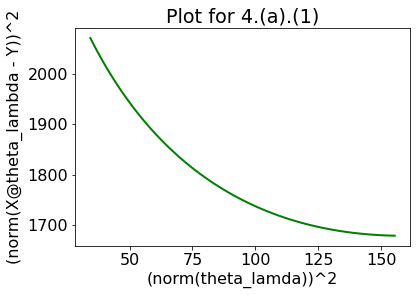



99
99


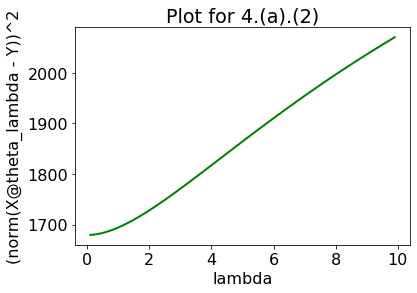

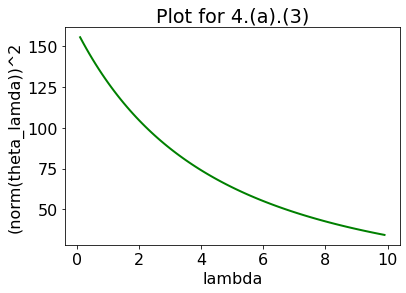

In [4]:
lambd = np.arange(0.1,10,0.1)

#(a)Plot 
#Ridge Regression
eye = np.identity(3)
Xt = np.transpose(X_new)
Y  = Y_new 

theta_lamb_4 = np.zeros((len(lambd),3))

for i in range(len(lambd)):
  theta_lamb_4[i,:] = ((LA.inv(XtX + lambd[i]*eye))@(Xt@Y))

#Plot 4.(a).(1)
theta_norm = np.zeros(len(lambd))
xThetaMinusY_norm = np.zeros(len(lambd))
for i in range(len(lambd)):
  theta_norm[i] = LA.norm(theta_lamb_4[i,:])
  xThetaMinusY_norm[i] = LA.norm(X_new@theta_lamb_4[i,:] - Y) 

xplot1 = np.square(theta_norm)
yplot1 = np.square(xThetaMinusY_norm)

plt.plot(xplot1,yplot1,linewidth='2',color='green')
plt.title("Plot for 4.(a).(1)")
plt.ylabel("(norm(X@theta_lambda - Y))^2")
plt.xlabel("(norm(theta_lamda))^2")
plt.savefig("Q4(a)(i).png")
plt.show()
print("\n")

print(len(lambd))
print(len(yplot1))

#Plot 4.(a).(2)
plt.plot(lambd,yplot1,linewidth='2',color='green')
plt.title("Plot for 4.(a).(2)")
plt.ylabel("(norm(X@theta_lambda - Y))^2")
plt.xlabel("lambda")
plt.savefig("Q4(a)(ii).png")
plt.show()
print("\n")

#Plot 4.(a).(3)
plt.plot(lambd,xplot1,linewidth='2',color='green')
plt.title("Plot for 4.(a).(3)")
plt.ylabel("(norm(theta_lamda))^2")
plt.xlabel("lambda")
plt.savefig("Q4(a)(iii).png")
plt.show()
print("\n")